_____________

# IMPORTS
_____________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gap_utils as gu

_____________
# READ DATA
________

In [37]:
FILE_PATH = './NIFTYMIDCAPSELECT_day.csv'
df = pd.read_csv(FILE_PATH)
print(len(df))

4545


___________________
___________________


In [38]:
last_x_days =None

In [39]:
if last_x_days == None:
    last_x_days = len(df) - 1 

In [40]:
d = df.copy()
d = d.tail(last_x_days)
d.reset_index(drop=True, inplace=True)

In [41]:
d['gap_per'] = (((d.shift(-1).open - d.close)/d.close)*100).shift(1)
d = d.dropna()
d.reset_index(drop=True, inplace=True)


# Close2Close (todays close - tommorows close)/tommorows close
d['close2close_per'] = (100*(d.shift(-1).close - d.close)/(d.close)).shift(1)
d = d.dropna()

In [42]:
gap_type = 'up'
lower_per =10
upper_per = 99.9999

In [43]:
if gap_type =='up':
    # Filter all the gaps that are up
    d = d[d['gap_per'] > 0]
elif gap_type =='down':
    # Filter all the gaps that are down
    d = d[d['gap_per'] < 0]
    d['gap_per'] = np.abs(d['gap_per'])

d.reset_index(drop=True, inplace=True)


RANGE OF GAP % CHANGE : 0.14% ----- 13.403%

NO OF DATA POINTS : 2366


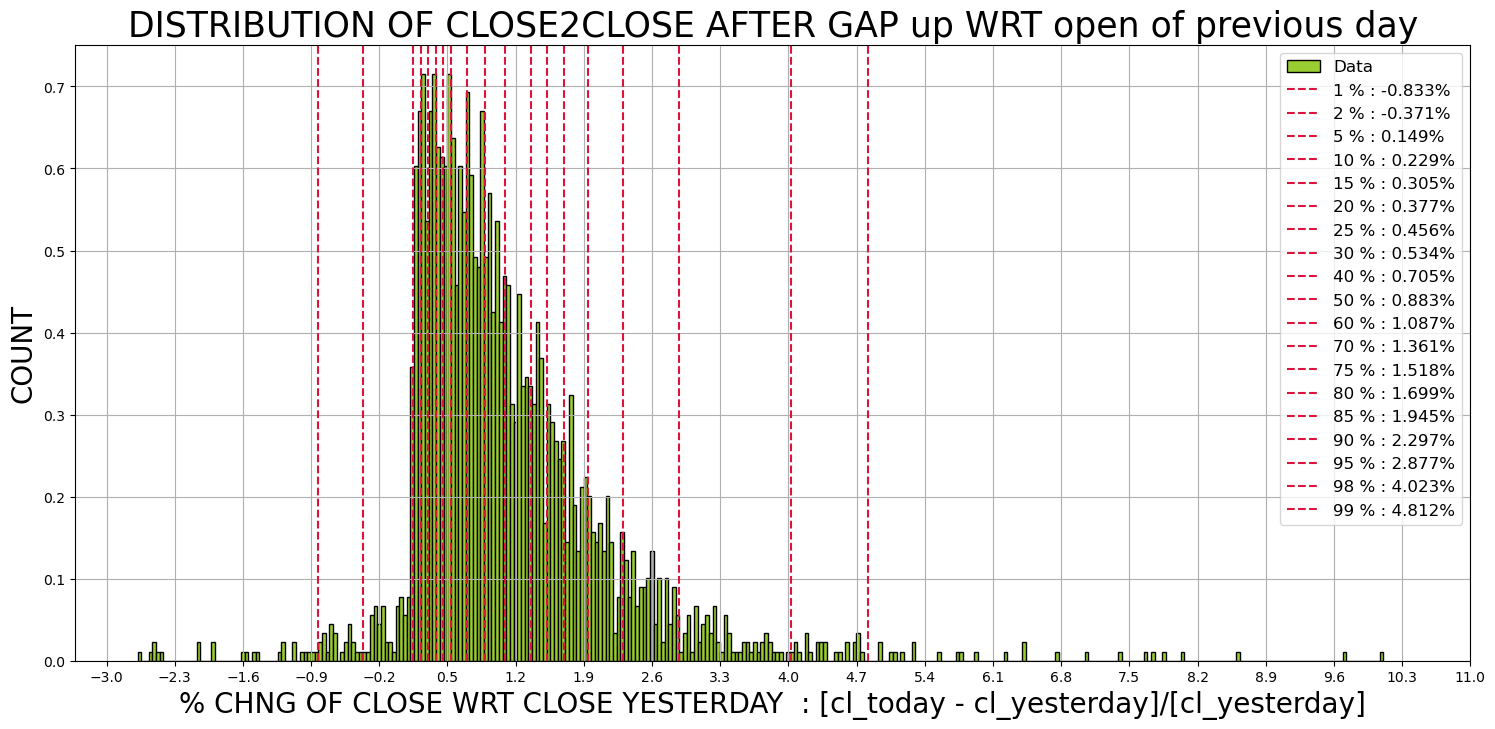

In [44]:













lower_quantile = np.percentile(d.gap_per, lower_per)
upper_quantile = np.percentile(d.gap_per, upper_per)

print(f"\nRANGE OF GAP % CHANGE : {lower_quantile.round(3)}% ----- {upper_quantile.round(3)}%")

# Assuming df is your DataFrame
d = d[(d['gap_per'] > lower_quantile) & (d['gap_per'] < upper_quantile)]
d.reset_index(drop=True, inplace=True)

nop = len(d)
print(f"\nNO OF DATA POINTS : {nop}")



series = d.close2close_per

# Set the figure size
plt.figure(figsize=(18, 8))  # Width = 10 inches, Height = 6 inches

if gap_type == 'up':
    rang = 'yellowgreen'
elif gap_type =='down':
    rang = 'lightpink'

# Create the histogram
plt.hist(series.round(4), bins=nop//7, color=rang, edgecolor='black', density=True, label='Data')

# Calculate percentiles
perc_list = [1, 2, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 75, 80, 85, 90, 95, 98, 99]
percentiles = np.percentile(series, perc_list)
percentiles = np.round(percentiles, 3)

# Plot vertical lines for percentiles
for percentage, percentile in zip(perc_list, percentiles):
    plt.axvline(x=percentile, color='crimson', linestyle='--', label=f'{percentage} % : {percentile}%')

# Add labels and title
plt.xlabel('% CHNG OF CLOSE WRT CLOSE YESTERDAY  : [cl_today - cl_yesterday]/[cl_yesterday]', fontsize=20)
plt.ylabel('COUNT', fontsize=20)
plt.title(f'DISTRIBUTION OF CLOSE2CLOSE AFTER GAP {gap_type} WRT open of previous day', fontsize=25)

# Set x-axis ticks and labels
plt.xticks(np.linspace(np.floor(series.min()), np.ceil(series.max()), 21))  # Adjust the number of ticks as needed

# Add Legend
plt.legend(fontsize=12)
# Add grid
plt.grid(True)
# Show the plot
plt.show()


_________________

# PLOT THE GAPS
_________________


RANGE OF GAP % CHANGE : 1.471% ----- 15.18%

NO OF DATA POINTS : 572


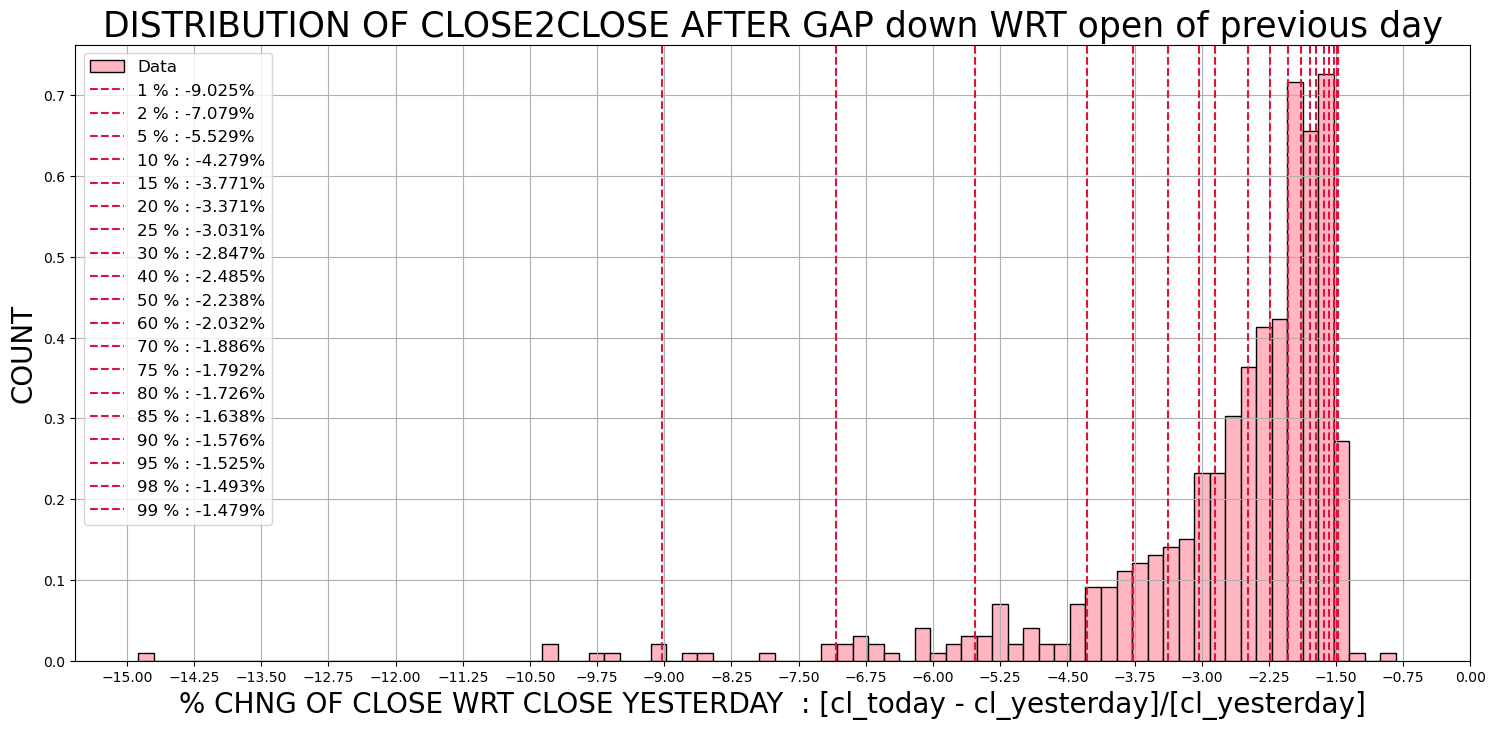

In [5]:
gu.plot_per_change_after_gap_wrt_prevopen(df, last_x_days = None, gap_type = 'down', lower_per =70, upper_per = 99.9999)

___________________________
___________________________
